In [1]:
import sys
import numpy
import matplotlib
import pandas
import sklearn



Python: 3.7.0 (default, Jun 28 2018, 08:04:48) [MSC v.1912 64 bit (AMD64)]
numpy: 1.15.1
%matplotlib: 2.2.3
pandas: 0.23.4
sklearn: 0.19.2


In [2]:
import numpy as np
from sklearn import  preprocessing, cross_validation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.metrics import classification_report, accuracy_score
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import pandas as pd


C:\Users\SAURABH\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
# Loading the dataset

In [58]:
url='http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data'
names='http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.names'

In [59]:
names=['id','clump thickness', 'uniform cell size', 'uniform cell shape','Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin','Normal Nucleoli','Mitoses','Class']

In [60]:
df=pd.read_csv(url)

In [61]:
names

['id',
 'clump thickness',
 'uniform cell size',
 'uniform cell shape',
 'Marginal Adhesion',
 'Single Epithelial Cell Size',
 'Bare Nuclei',
 'Bland Chromatin',
 'Normal Nucleoli',
 'Mitoses',
 'Class']

In [62]:
df.columns=[names]

In [63]:
df.head()

,id,clump thickness,uniform cell size,uniform cell shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [64]:
dtypeCount =[df.iloc[:,i].apply(type).value_counts() for i in range(df.shape[1])]

In [46]:
dtypeCount

[<class 'int'>    698
 Name: (id,), dtype: int64, <class 'int'>    698
 Name: (clump thickness,), dtype: int64, <class 'int'>    698
 Name: (uniform cell size,), dtype: int64, <class 'int'>    698
 Name: (uniform cell shape,), dtype: int64, <class 'int'>    698
 Name: (Marginal Adhesion,), dtype: int64, <class 'int'>    698
 Name: (Single Epithelial Cell Size,), dtype: int64, <class 'str'>    698
 Name: (Bare Nuclei,), dtype: int64, <class 'int'>    698
 Name: (Bland Chromatin,), dtype: int64, <class 'int'>    698
 Name: (Normal Nucleoli,), dtype: int64, <class 'int'>    698
 Name: (Mitoses,), dtype: int64, <class 'int'>    698
 Name: (Class,), dtype: int64]

In [65]:
# Preprocessing the Data
df.replace('?',9999999, inplace=True)

In [66]:
print(df.axes)

[RangeIndex(start=0, stop=698, step=1), MultiIndex(levels=[['Bare Nuclei', 'Bland Chromatin', 'Class', 'Marginal Adhesion', 'Mitoses', 'Normal Nucleoli', 'Single Epithelial Cell Size', 'clump thickness', 'id', 'uniform cell shape', 'uniform cell size']],
           labels=[[8, 7, 10, 9, 3, 6, 0, 1, 5, 4, 2]])]


In [67]:
df=df.drop('id',axis=1)

C:\Users\SAURABH\Anaconda3\lib\site-packages\pandas\core\generic.py:3111: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [78]:
df.head()

,clump thickness,uniform cell size,uniform cell shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,4,4,5,7,10,3,2,1,2
1,3,1,1,1,2,2,3,1,1,2
2,6,8,8,1,3,4,3,7,1,2
3,4,1,1,3,2,1,3,1,1,2
4,8,10,10,8,7,10,9,7,1,4


In [81]:
df['clump thickness'].loc[5]

clump thickness    1
Name: 5, dtype: int64

In [83]:
print(df.describe())

      clump thickness uniform cell size uniform cell shape Marginal Adhesion  \
count      698.000000        698.000000         698.000000        698.000000   
mean         4.416905          3.137536           3.210602          2.809456   
std          2.817673          3.052575           2.972867          2.856606   
min          1.000000          1.000000           1.000000          1.000000   
25%          2.000000          1.000000           1.000000          1.000000   
50%          4.000000          1.000000           1.000000          1.000000   
75%          6.000000          5.000000           5.000000          4.000000   
max         10.000000         10.000000          10.000000         10.000000   

      Single Epithelial Cell Size Bland Chromatin Normal Nucleoli     Mitoses  \
count                  698.000000      698.000000      698.000000  698.000000   
mean                     3.217765        3.438395        2.869628    1.590258   
std                      2.215408   

In [84]:
# Plot histograms

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024873D829E8>,
      dtype=object)

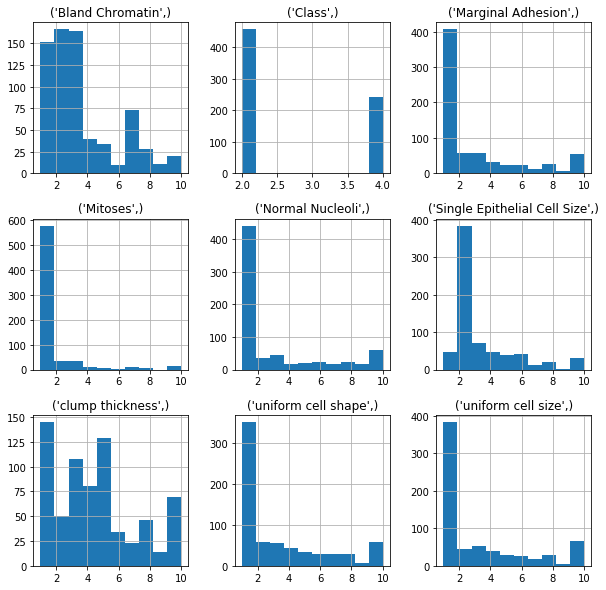

In [87]:
df.hist(figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024874424DA0>,
      dtype=object)

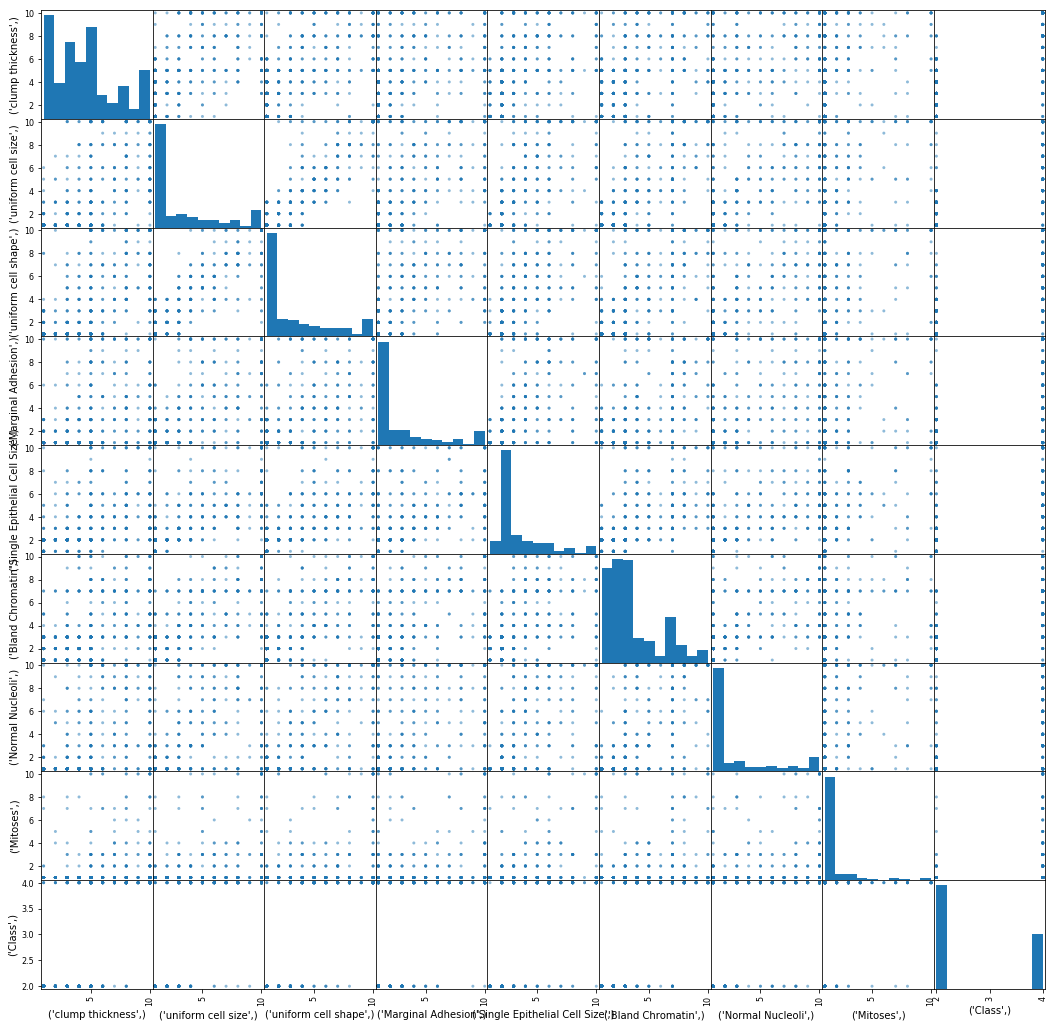

In [88]:
# see the correlation between these variables
scatter_matrix(df,figsize=(18,18))

In [106]:
# creating the train-test
x=df.iloc[:,:-1]
y=np.array(df.iloc[:,-1])

In [166]:
x_train,x_test,y_train,y_test=cross_validation.train_test_split(x,y,test_size=0.2)

In [167]:
#defined models to train
models=[]
models.append(('KNN',KNeighborsClassifier(n_neighbors=5)))
models.append(('SVM',SVC()))
# Evaluate each models in turn
results=[]
names=[]


for name, model in models:
    kfold=model_selection.KFold(n_splits=10,random_state=8)
    cvresults=model_selection.cross_validate(model,x_train,y_train,cv=kfold,scoring='accuracy')
    
    
    results.append(cvresults)
    names.append(name)
    msg= "%s: %f (%f)" % (name,cvresults['test_score'].mean(),cvresults['test_score'].std())
    print(msg)

KNN: 0.969513 (0.024103)
SVM: 0.955260 (0.019893)


In [168]:
# Making predictions on validation dataset

In [169]:
for name, model in models:
    model.fit(x_train,y_train)
    predictions=model.predict(x_test)
    print(name)
    print(accuracy_score(y_test,predictions))
    print(classification_report(y_test,predictions))

KNN
0.9857142857142858
             precision    recall  f1-score   support

          2       0.98      1.00      0.99        81
          4       1.00      0.97      0.98        59

avg / total       0.99      0.99      0.99       140

SVM
0.9571428571428572
             precision    recall  f1-score   support

          2       1.00      0.93      0.96        81
          4       0.91      1.00      0.95        59

avg / total       0.96      0.96      0.96       140



In [179]:
clf=SVC()

clf.fit(x_train,y_train)
accuracy=clf.score(x_test,y_test)
print(accuracy)



example=np.array([[4,2,5,1,1,2,3,2,1]])

prediction=clf.predict(example)

print(prediction)



0.9571428571428572
[2]
